<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thank you for taking the time to improve the project! Now it is accepted and you can move on to the next sprint. Good luck!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job! There's one small problem that needs to be fixed before the project is accepted, but it should be very straightforward. Let me know if you have any questions!

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

**The main job is to build and evaluate models on your own.**

Project Instructions:
    
1) Load the data.

2) Preprocess the data, if required.

3) Conduct an EDA and make your conclusion on the class imbalance.

4) Preprocess the data for modeling.

5) Train at least three different models for the given train dataset.

6) Test the models for the given test dataset.

7) Compose a few of your own reviews and classify them with all the models.

8) Check for differences between the testing results of models in the above two points. Try to explain them.

9) Present your findings.

**Additional tips:**

*We suggest trying classification models based on **logistic regression and gradient boosting**, but feel free to try other methods.*

You don't have to use BERT for the project because it is very demanding for computational power and will be very slow on the CPU for the complete dataset. Because of this, BERT usually needs to be executed on GPU for adequate performance. However, you are more than welcome to try and include BERT in the project for a part of the dataset. If you want to do this, we suggest doing so locally and only taking a couple hundred of objects per each part of the (train/test) dataset to avoid waiting too long. Make sure to indicate your use of BERT in the first cell (the header of your project).

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [4]:
df = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


**The data was loaded successfully, moving on to preprocessing**

## Preprocessing

<div class="alert alert-info">
<b>Student's comment V1</b>

In the lessons, we only used the reviews themselves as features to train the model.
Therefore, I chose to remove any columns that are not relevant to the EDA step or will not be involved
in any model predictions.

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Sure, as this is a project about working with text, that makes sense!

</div>

**Removing irrelevant data**

In [6]:
df = df.drop(['title_type', 'primary_title', 'original_title', 'end_year', 
                              'runtime_minutes','is_adult', 'genres', 'average_rating', 
                              'votes', 'sp', 'idx'], axis=1)
df

,tconst,start_year,review,rating,pos,ds_part
0,tt0068152,1971,The pakage implies that Warren Beatty and Gold...,1,0,train
1,tt0068152,1971,How the hell did they get this made?! Presenti...,1,0,train
2,tt0313150,2002,There is no real story the film seems more lik...,3,0,test
3,tt0313150,2002,Um .... a serious film about troubled teens in...,7,1,test
4,tt0313150,2002,I'm totally agree with GarryJohal from Singapo...,9,1,test
...,...,...,...,...,...,...
47326,tt0068398,1972,This is another of my favorite Columbos. It sp...,10,1,test
47327,tt0223503,1996,Talk about being boring! I got this expecting ...,4,0,test
47328,tt0223503,1996,"I never thought I'd say this about a biopic, b...",8,1,test
47329,tt0223503,1996,Spirit and Chaos is an artistic biopic of Miya...,9,1,test


## EDA

**Let's check the number of movies and reviews over years.**

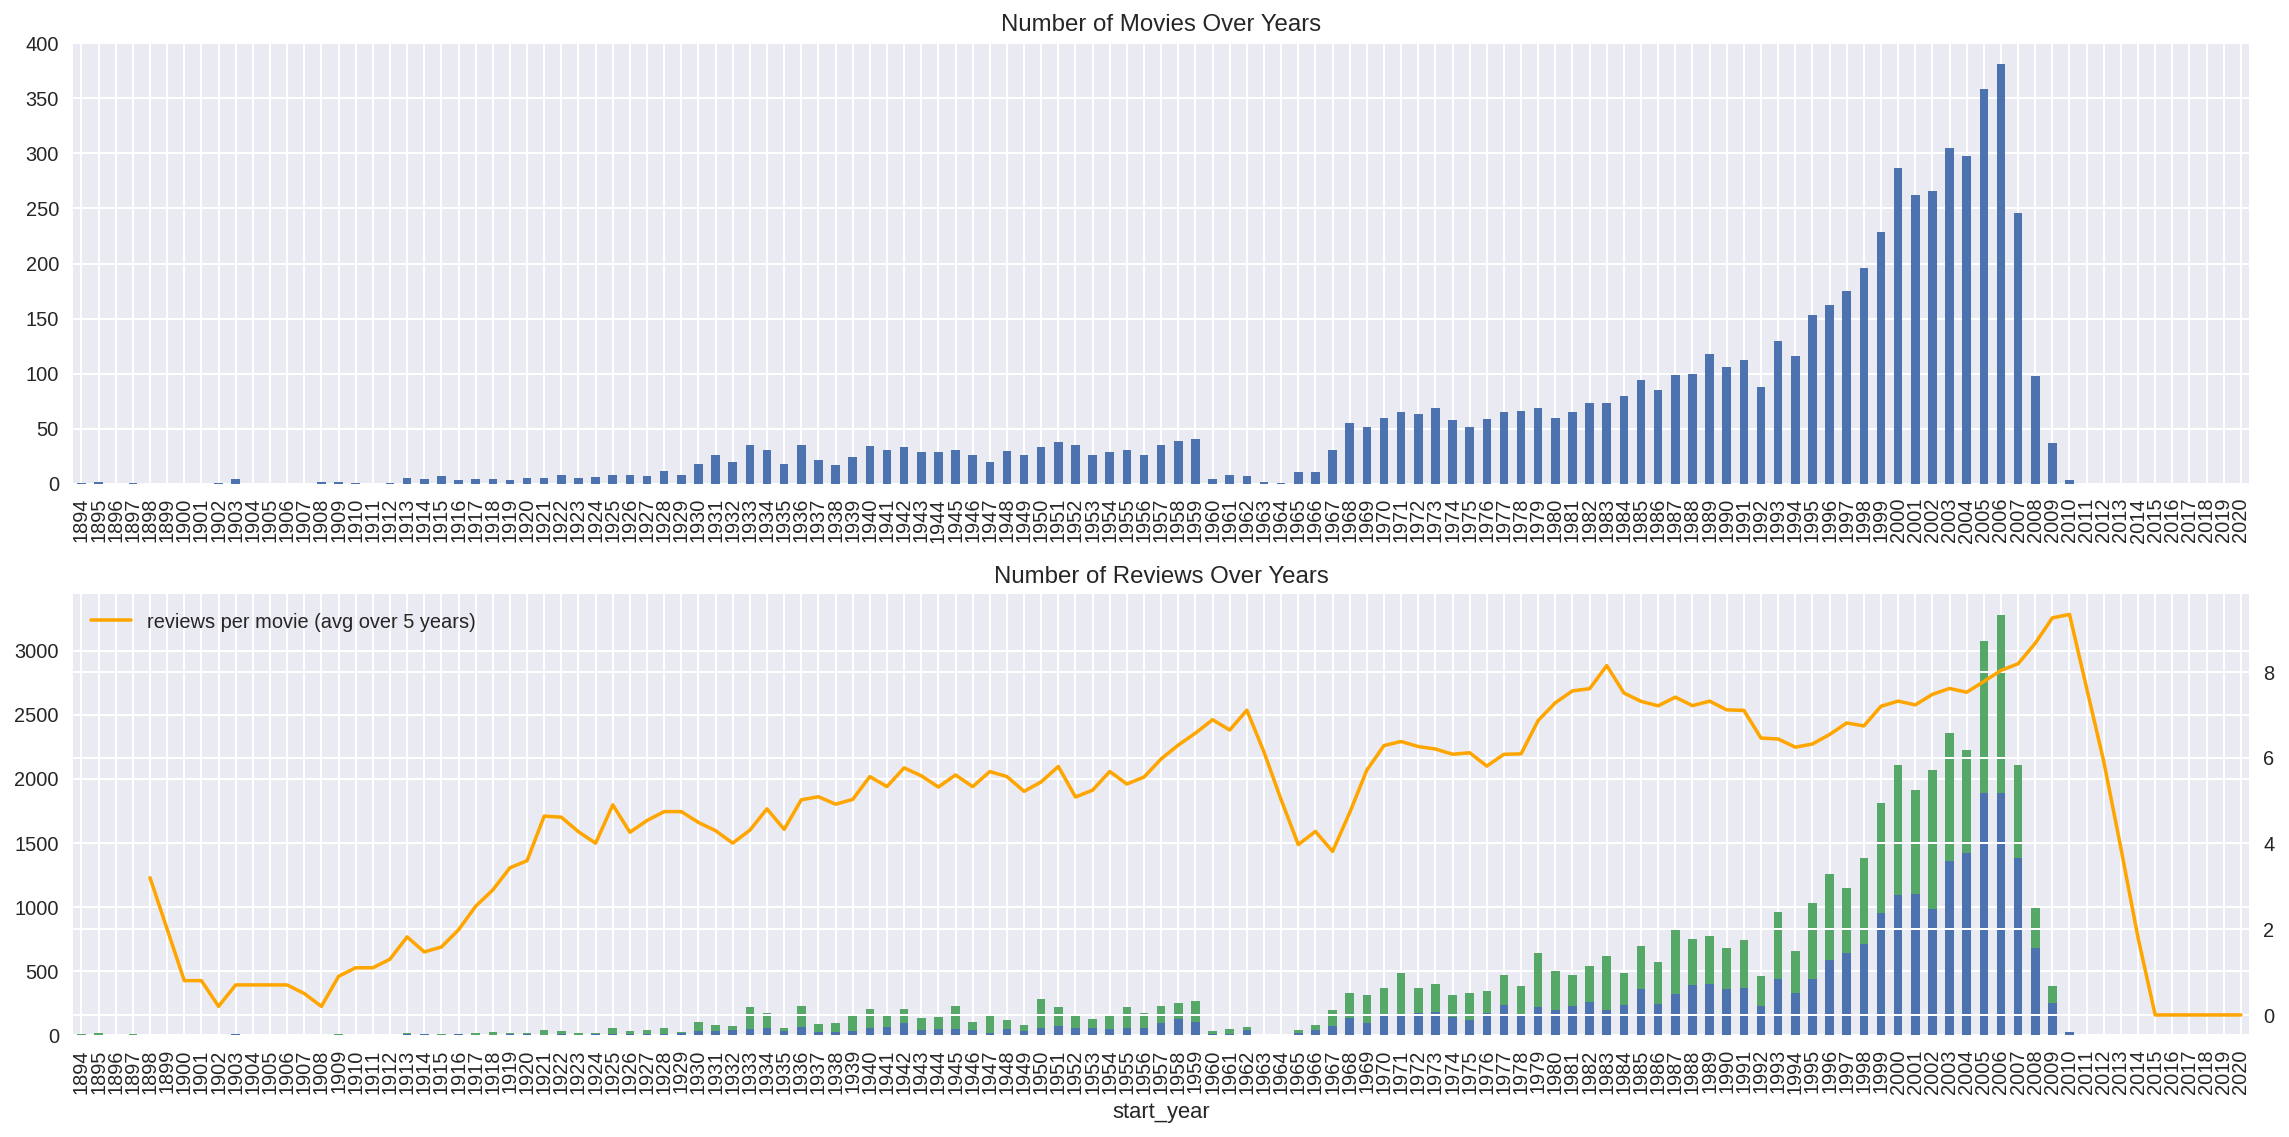

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)

#max(dft1.index.max(), 2021) -- returns the largest of the two
#np.arange(dft1.index.min(), dft1.index.max() will return a list of evenly spaced values within the specified range)
#This code is a way to include years that don't have a specific movie start_year value

dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax) 

dft2 = df['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

### Movies and Reviews Over Years:

1) The number of movies showed a steady increase from the 1930's up until the mid 1990's, where the number of movies being released increased significantly.

2) There is a 10 year rapid growth of movies produced starting from 1995 up until the peak in 2006 where movies nearly quadrupled in numbers.

3) After to 2006 there is a rapid decline in movies produced up until 2011, the year the data was being compiled.

Moving on to the number of reviews graph: 

1) The number of reviews also shows a steady increase until the mid 1990s, where theres a sharp increase until 2006.

2) This is further illustrated with the reviews per movie, depicted as the orange line.

3) Green bars represented the negative reviews while blue represented the positive reviews. 

4) The graph shows that negative reviews consistantly outnumber positive reviews, even moreso towards the rightside of the graph.

**Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)**

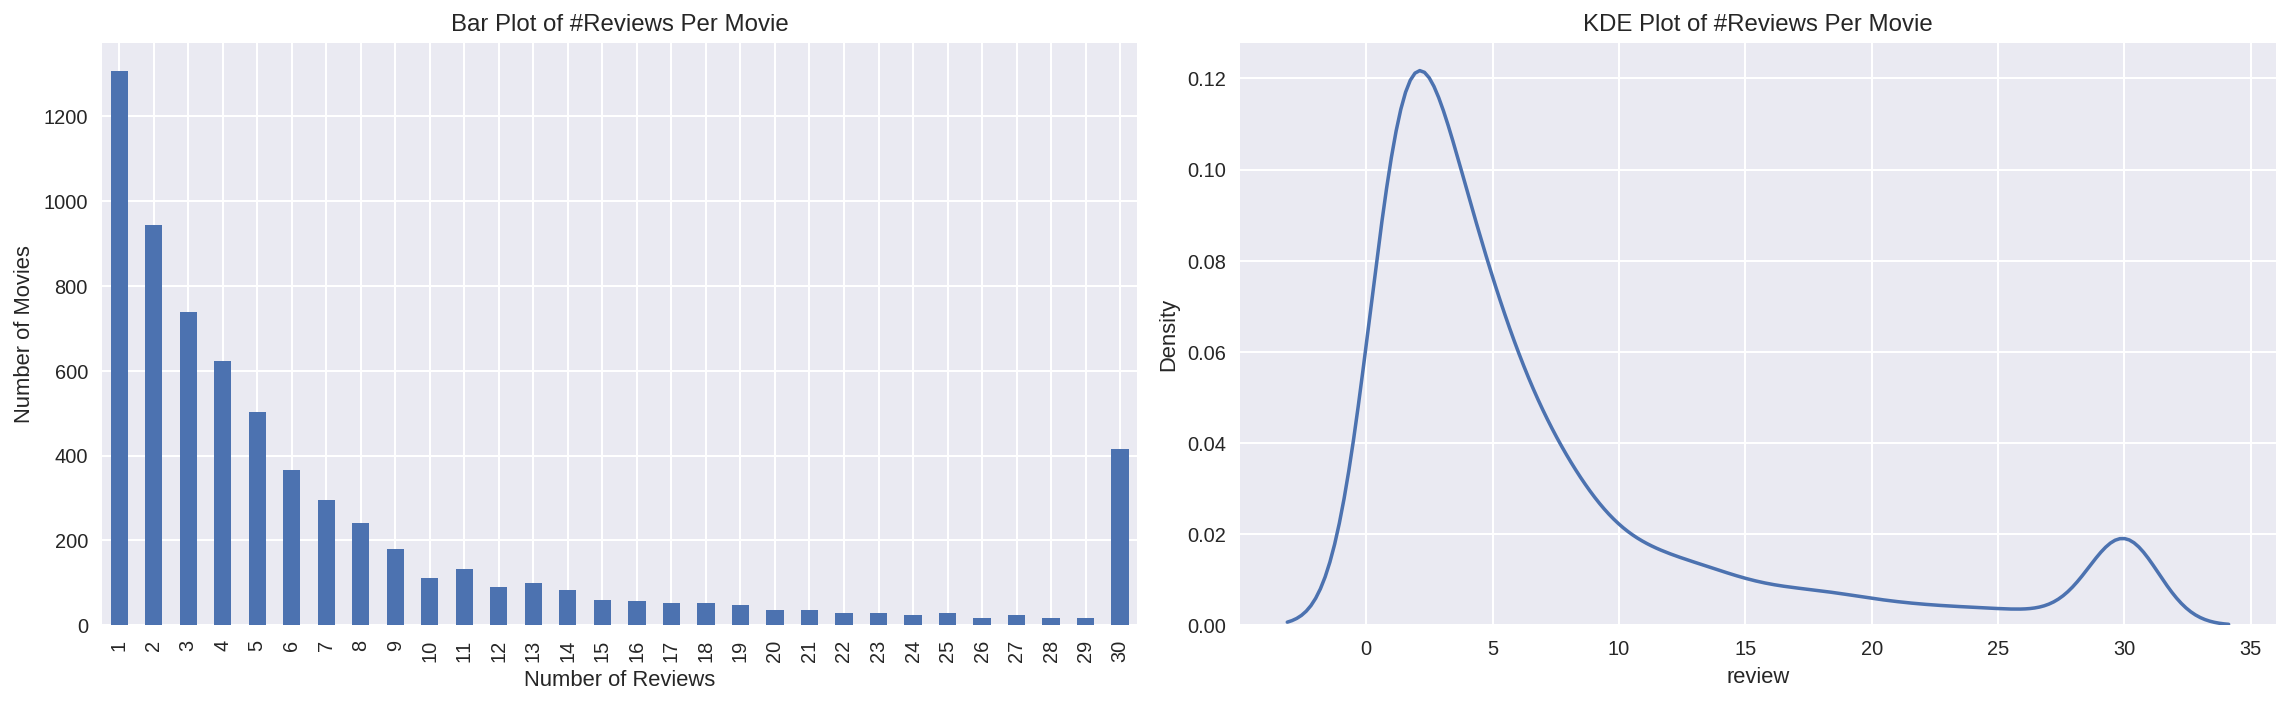

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')
ax.set(xlabel='Number of Reviews', ylabel='Number of Movies')

ax = axs[1]
dft = df.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')
#KDE is a smoothed version of a histogram, it has the same purpose/function

fig.tight_layout()

### Bar and KDE Plot of #Reviews Per Movie:

**Bar Plot:**

1) The polarity of reviews for unpopular and popular movies is showcased in the bar graph.

2) We can see that the number of movies generally populate the 1 - 5 reviews range, meaning that they are not as popular.

3) Most movies in the 10 - 29 review range would be considered average popularity.

4) The number of movies rises again specifically at movies with 30 reviews, indicating that about 400 movies were very popular with review critics.

**KDE Plot**

1) The density further illustrates where most of the movies lie in the range of number of reviews.

2) The large peak from 0 - 5 confirms that most movies have this amount of reviews, while only  a handful become popular enough to receive more.

3) These graphs indirectly communicate how difficult it is for most movies to achieve an audience.

In [9]:
df['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

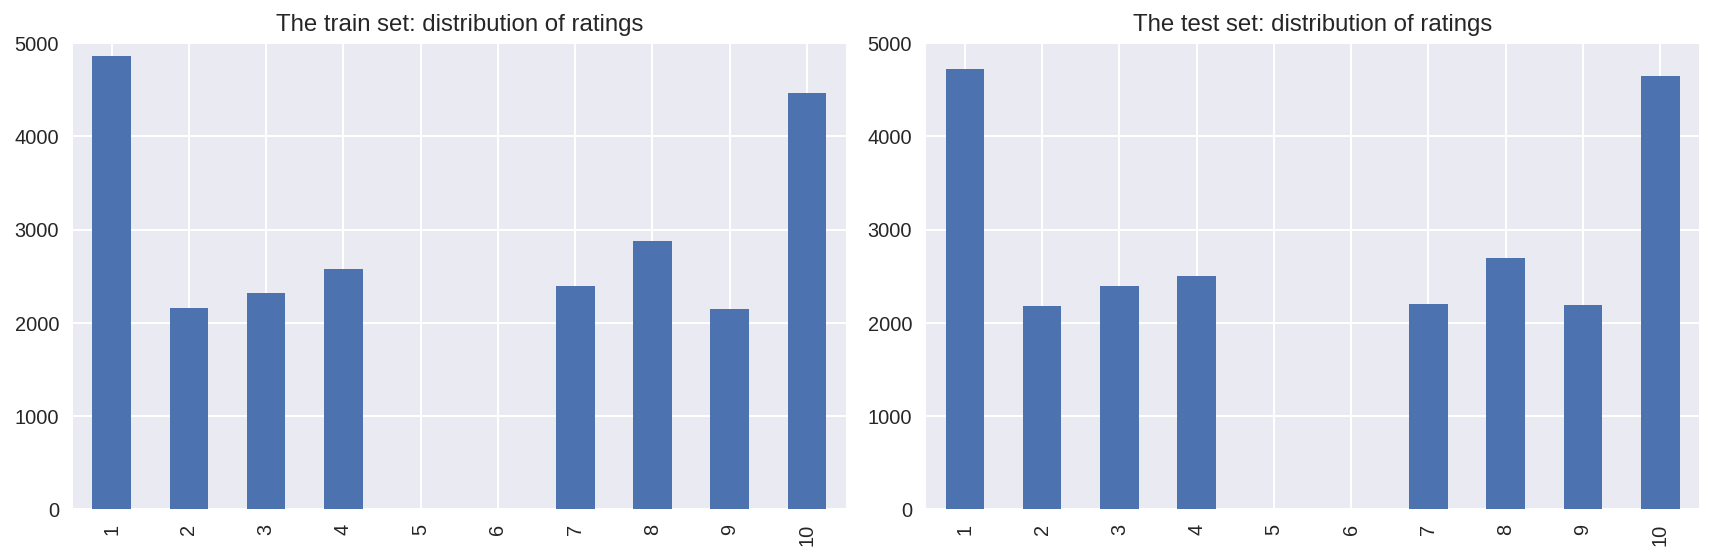

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

### Train & Test Ratings Distribution:

1) The distribution for both train and test set are nearly identical, which shows the data is fit to be used for model training and prediction.

**Distribution of negative and positive reviews over the years for two parts of the dataset**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


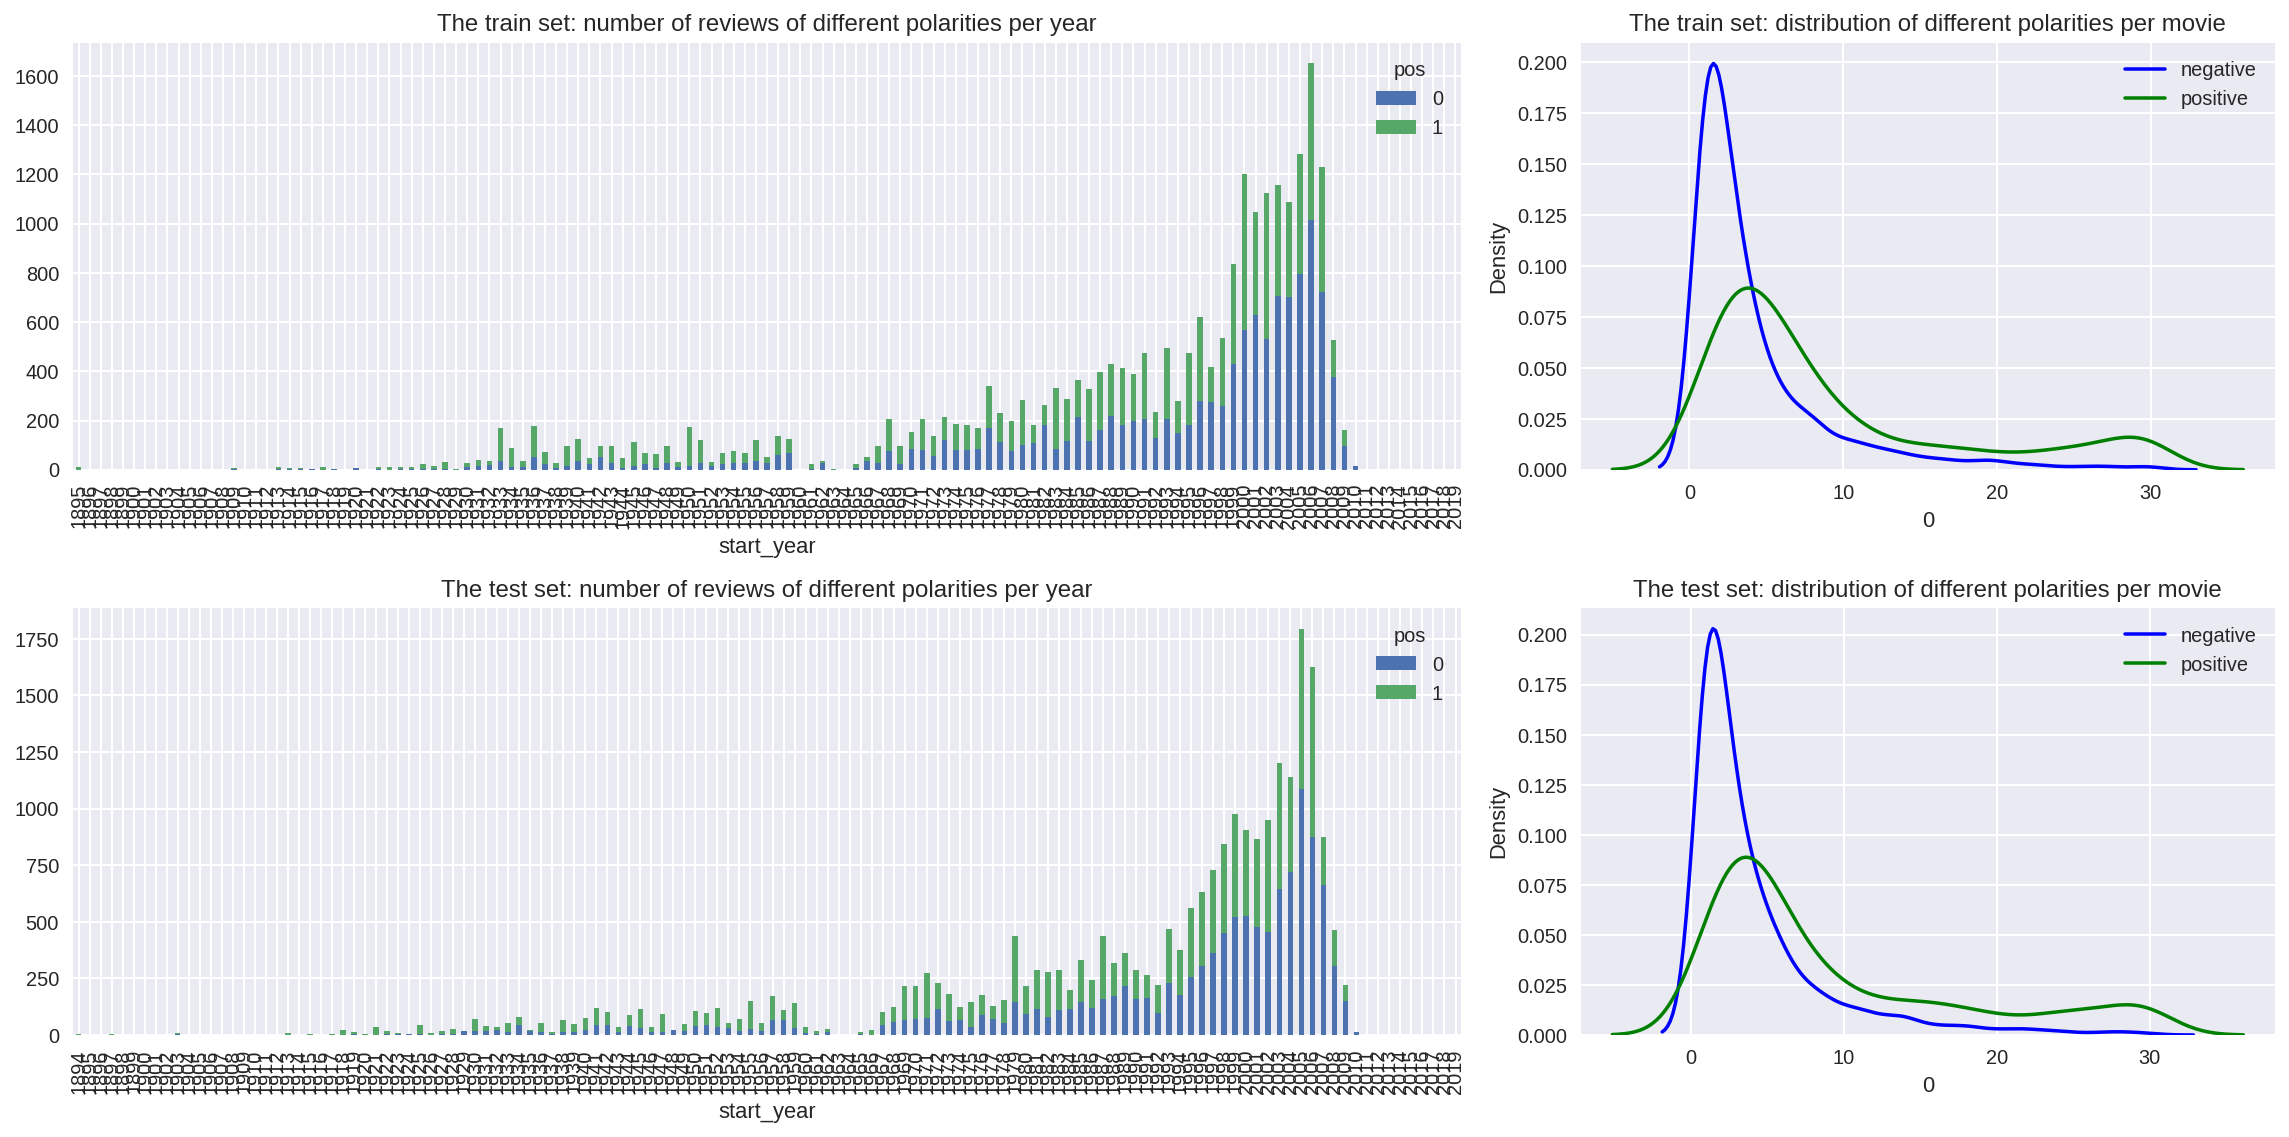

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

### Distribution of Yearly Pos & Neg Reviews (Train/Test):

1) The distribution for the positive and negative reviews is similar.

2) This density plot further supports this, since we see identical peaks for positive and negative reviews in the same areas along the x-axis.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you explored the data and made some interesting observations!

</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [12]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization

**Normalization Details:**

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

With the normalized data, we will split into: X_train, X_test, y_train, y_test

**Lemmatization/Preprocessing Details:**

*Lowercase and Lemmatization will be achieved*

Each model highlights utilization of a specific preprocessing function: **spaCy or NLTK**.

The **X_train and X_test** variables will be altered before model training, depending on which preprocessing function the model requires. 

*y_train and y_test do not require preprocessing -- they are categorical targets*

In [13]:
%%time
import re


CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 18.4 µs


<div class="alert alert-info">
<b>Student's comment V1</b>

Importing spacy takes awhile, I'm not sure how I can decrease the loading time.

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yeah, there's not much you can do, unfortunately

</div>

In [14]:
#df1 = df.copy()
corpus = df['review']

def clear_text(text):
    
    pattern = r"[^a-zA-z']" 
    text = re.sub(pattern, " ", str(text)).lower().split()
    text = " ".join(text)
    return text

In [15]:
corpus

0        The pakage implies that Warren Beatty and Gold...
1        How the hell did they get this made?! Presenti...
2        There is no real story the film seems more lik...
3        Um .... a serious film about troubled teens in...
4        I'm totally agree with GarryJohal from Singapo...
                               ...                        
47326    This is another of my favorite Columbos. It sp...
47327    Talk about being boring! I got this expecting ...
47328    I never thought I'd say this about a biopic, b...
47329    Spirit and Chaos is an artistic biopic of Miya...
47330    I'll make this brief. This was a joy to watch....
Name: review, Length: 47331, dtype: object

In [16]:
%%time

df['review_norm'] = corpus.progress_apply(clear_text) #apply iterates through each row
df['review_norm'] 

  0%|          | 0/47331 [00:00<?, ?it/s]

CPU times: user 5.2 s, sys: 142 ms, total: 5.35 s
Wall time: 5.77 s


0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made presenting...
2        there is no real story the film seems more lik...
3        um a serious film about troubled teens in sing...
4        i'm totally agree with garryjohal from singapo...
                               ...                        
47326    this is another of my favorite columbos it spo...
47327    talk about being boring i got this expecting a...
47328    i never thought i'd say this about a biopic bu...
47329    spirit and chaos is an artistic biopic of miya...
47330    i'll make this brief this was a joy to watch i...
Name: review_norm, Length: 47331, dtype: object

**Now the data has been normalized in df['review_norm'].**

<div class="alert alert-success">
<b>Reviewer's comment</b>

Normalization looks good!

</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [17]:
train = df.query('ds_part == "train"').copy()
test = df.query('ds_part == "test"').copy()

print(train.shape)
print(test.shape)

(23796, 7)
(23535, 7)


**Removing any unnecessary columns**

In [18]:
#X has df['review_norm'], y has df['pos'].
#X_train = train.drop(['tconst', 'start_year', 'review', 
                                         #'rating', 'pos', 'ds_part'], axis=1)
#X_test = test.drop(['tconst', 'start_year', 'review', 
                                         #'rating', 'pos', 'ds_part'], axis=1)

#y_train = train.drop(['tconst', 'start_year', 'review', 
                                         #'rating', 'review_norm', 'ds_part'], axis=1)
#y_test = test.drop(['tconst', 'start_year', 'review', 
                                         #'rating', 'review_norm', 'ds_part'], axis=1)

X_train = train['review_norm'].to_frame()
X_test = test['review_norm'].to_frame()
y_train = train['pos'].to_frame()
y_test = test['pos'].to_frame()

print(X_train.info())
print(X_test.info())
print(y_train.info())
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23796 entries, 0 to 47257
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_norm  23796 non-null  object
dtypes: object(1)
memory usage: 371.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23535 entries, 2 to 47330
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_norm  23535 non-null  object
dtypes: object(1)
memory usage: 367.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23796 entries, 0 to 47257
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pos     23796 non-null  int64
dtypes: int64(1)
memory usage: 371.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23535 entries, 2 to 47330
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pos

<div class="alert alert-warning">
<b>Reviewer's comment</b>

> #X has df['review_norm'], y has df['pos'].
    
Why not just write it as such (e.g. `X_train = train['review_norm']`)? It would be easier to understand :)

</div>

In [19]:
print(X_train.shape)
print(X_test.shape)

(23796, 1)
(23535, 1)


**Using .squeeze() to convert features into a series object -- required for proper model fitting**

In [20]:
X_train = X_train.squeeze()
X_test = X_test.squeeze()
print(X_test.shape)
print(X_train.shape)

(23535,)
(23796,)


## Working with models

### Model 0 - Constant

In [21]:
from sklearn.dummy import DummyClassifier

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


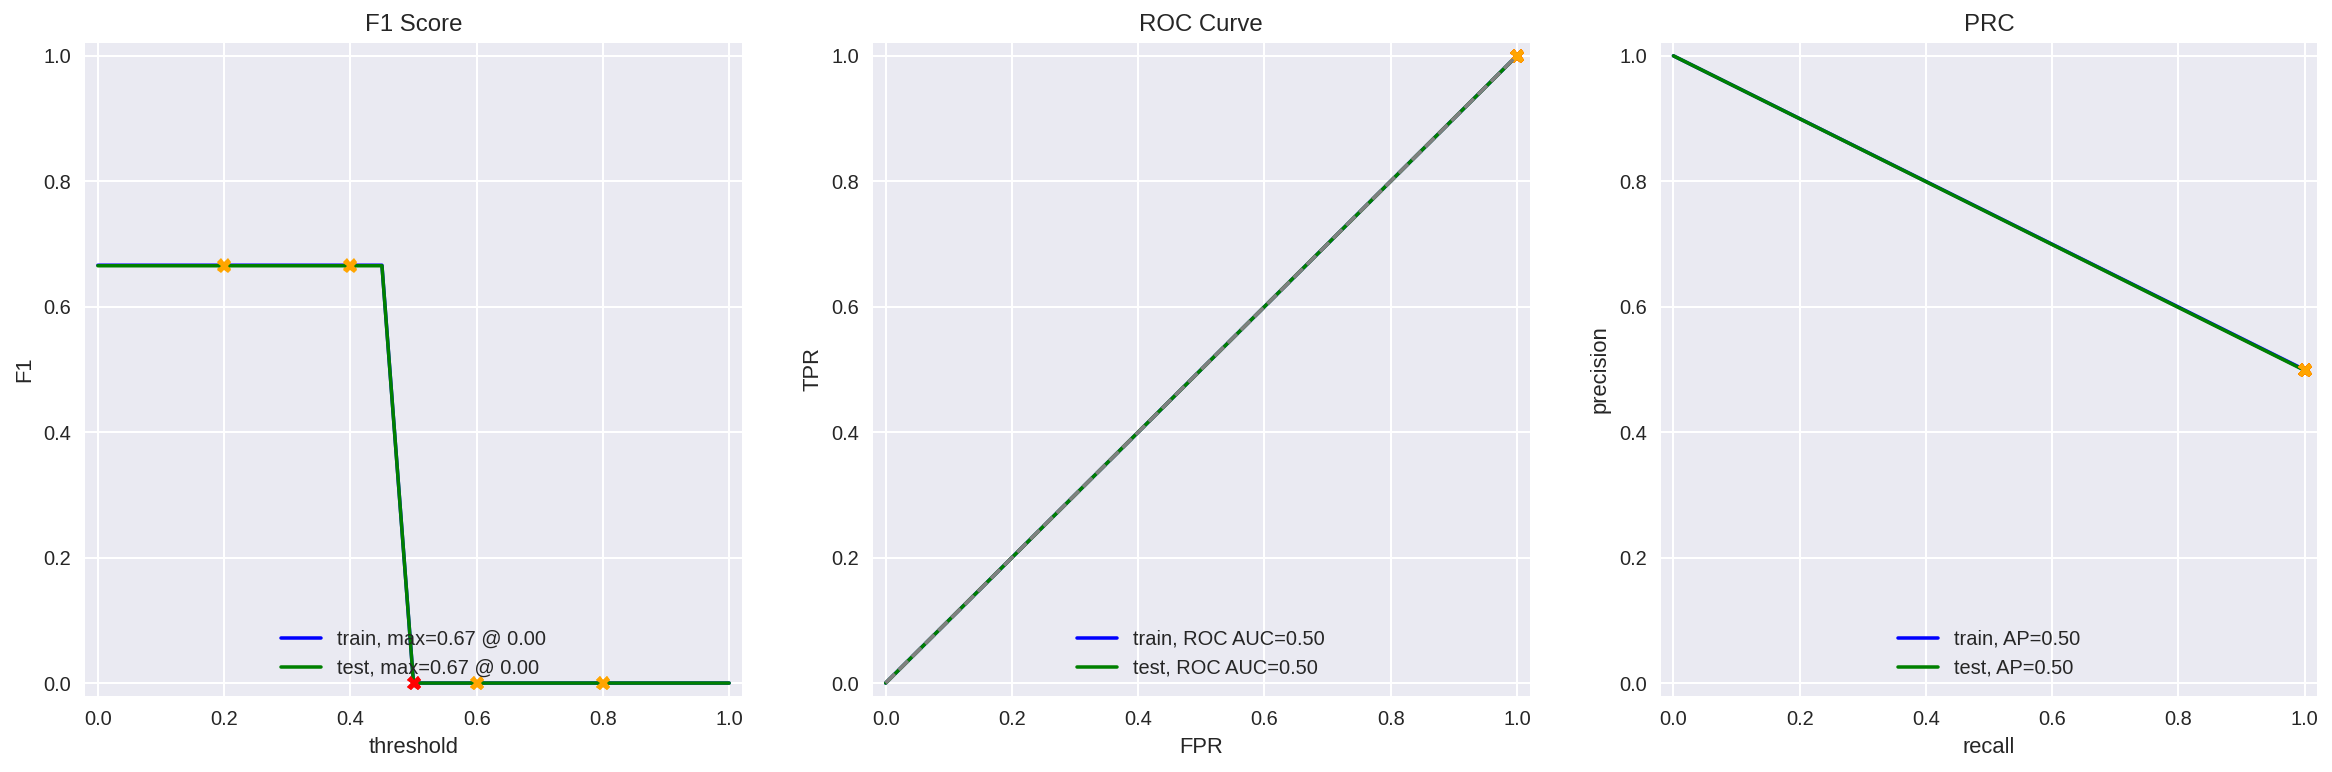

In [22]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_train)
#dummy_clf.score(X_train, y_train)
evaluate_model(dummy_clf, X_train, y_train, X_test, y_test)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, there's our baseline!

</div>

### Model 1 - NLTK, TF-IDF and LR

In [23]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet') 
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Pre-lemmatization Evaluation**

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(23796,)
(23535,)
(23796, 1)
(23535, 1)
(23796, 71676)
(23535, 71676)
          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


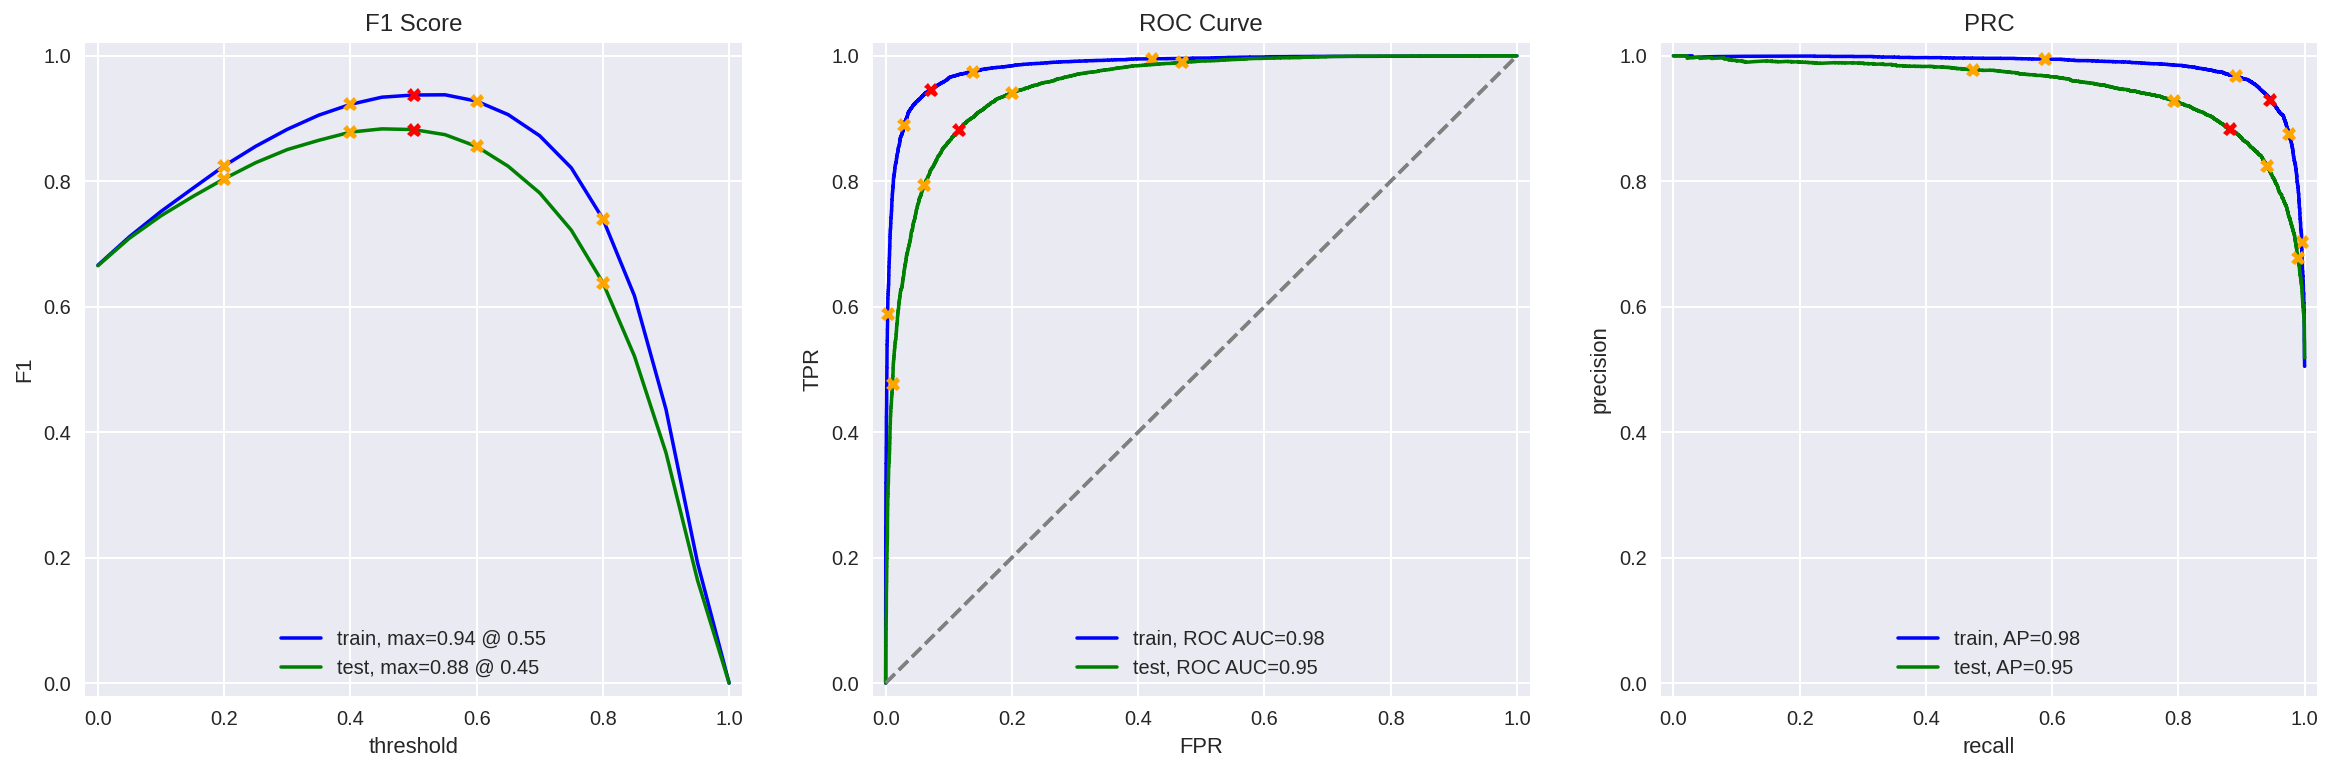

In [24]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()

#defining vectorizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(nltk_stopwords.words('english'))
count_tf_idf1 = TfidfVectorizer(stop_words=stop_words)

#Defining train features & target
X_train1_TFIDF = count_tf_idf1.fit_transform(X_train1) #"use TF-IDF vectors for lemmatized reviews as features"
X_test1_TFIDF = count_tf_idf1.transform(X_test1)

#Defining model and fitting
model_1 = LogisticRegression()
model_1.fit(X_train1_TFIDF, y_train)
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train1_TFIDF.shape)
print(X_test1_TFIDF.shape)

#Evaluation
evaluate_model(model_1, X_train1_TFIDF, y_train, X_test1_TFIDF, y_test)

**Lemmatization**

In [25]:
def lemmatize1(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text) 
#we need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemmas=[]
    for w in tokens:
        lemmas.append(lemmatizer.lemmatize(w))
        lemmas.append(" ")
    return "".join(lemmas)


In [26]:
X_train1 = X_train1.progress_apply(lemmatize1)
X_train1

  0%|          | 0/23796 [00:00<?, ?it/s]

0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made presenting...
7        this true story of carlson 's raider is more o...
8        should have been titled 'balderdash ' little i...
9        the movie 'gung ho ' the story of carlson 's m...
                               ...                        
47253    o my gosh just give me a minute to breath this...
47254    i ca n't tell you all how much i love this mov...
47255    legend of zu is possibly the most exciting mov...
47256    this movie is well done on so many level that ...
47257    a a history nut who is particularly interested...
Name: review_norm, Length: 23796, dtype: object

In [27]:
X_test1 = X_test1.progress_apply(lemmatize1)
X_test1

  0%|          | 0/23535 [00:00<?, ?it/s]

2        there is no real story the film seems more lik...
3        um a serious film about troubled teen in singa...
4        i 'm totally agree with garryjohal from singap...
5        this is the first movie i 've seen from singap...
6        yes non singaporean 's ca n't see what 's the ...
                               ...                        
47326    this is another of my favorite columbo it spor...
47327    talk about being boring i got this expecting a...
47328    i never thought i 'd say this about a biopic b...
47329    spirit and chaos is an artistic biopic of miya...
47330    i 'll make this brief this wa a joy to watch i...
Name: review_norm, Length: 23535, dtype: object

**Fitting**

In [28]:
#Defining train features & target
X_train1_TFIDF = count_tf_idf1.fit_transform(X_train1) #"use TF-IDF vectors for lemmatized reviews as features"
X_test1_TFIDF = count_tf_idf1.transform(X_test1)

In [29]:
model_1 = LogisticRegression()
model_1.fit(X_train1_TFIDF, y_train)
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train1_TFIDF.shape)
print(X_test1_TFIDF.shape)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(23796,)
(23535,)
(23796, 1)
(23535, 1)
(23796, 64447)
(23535, 64447)


          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


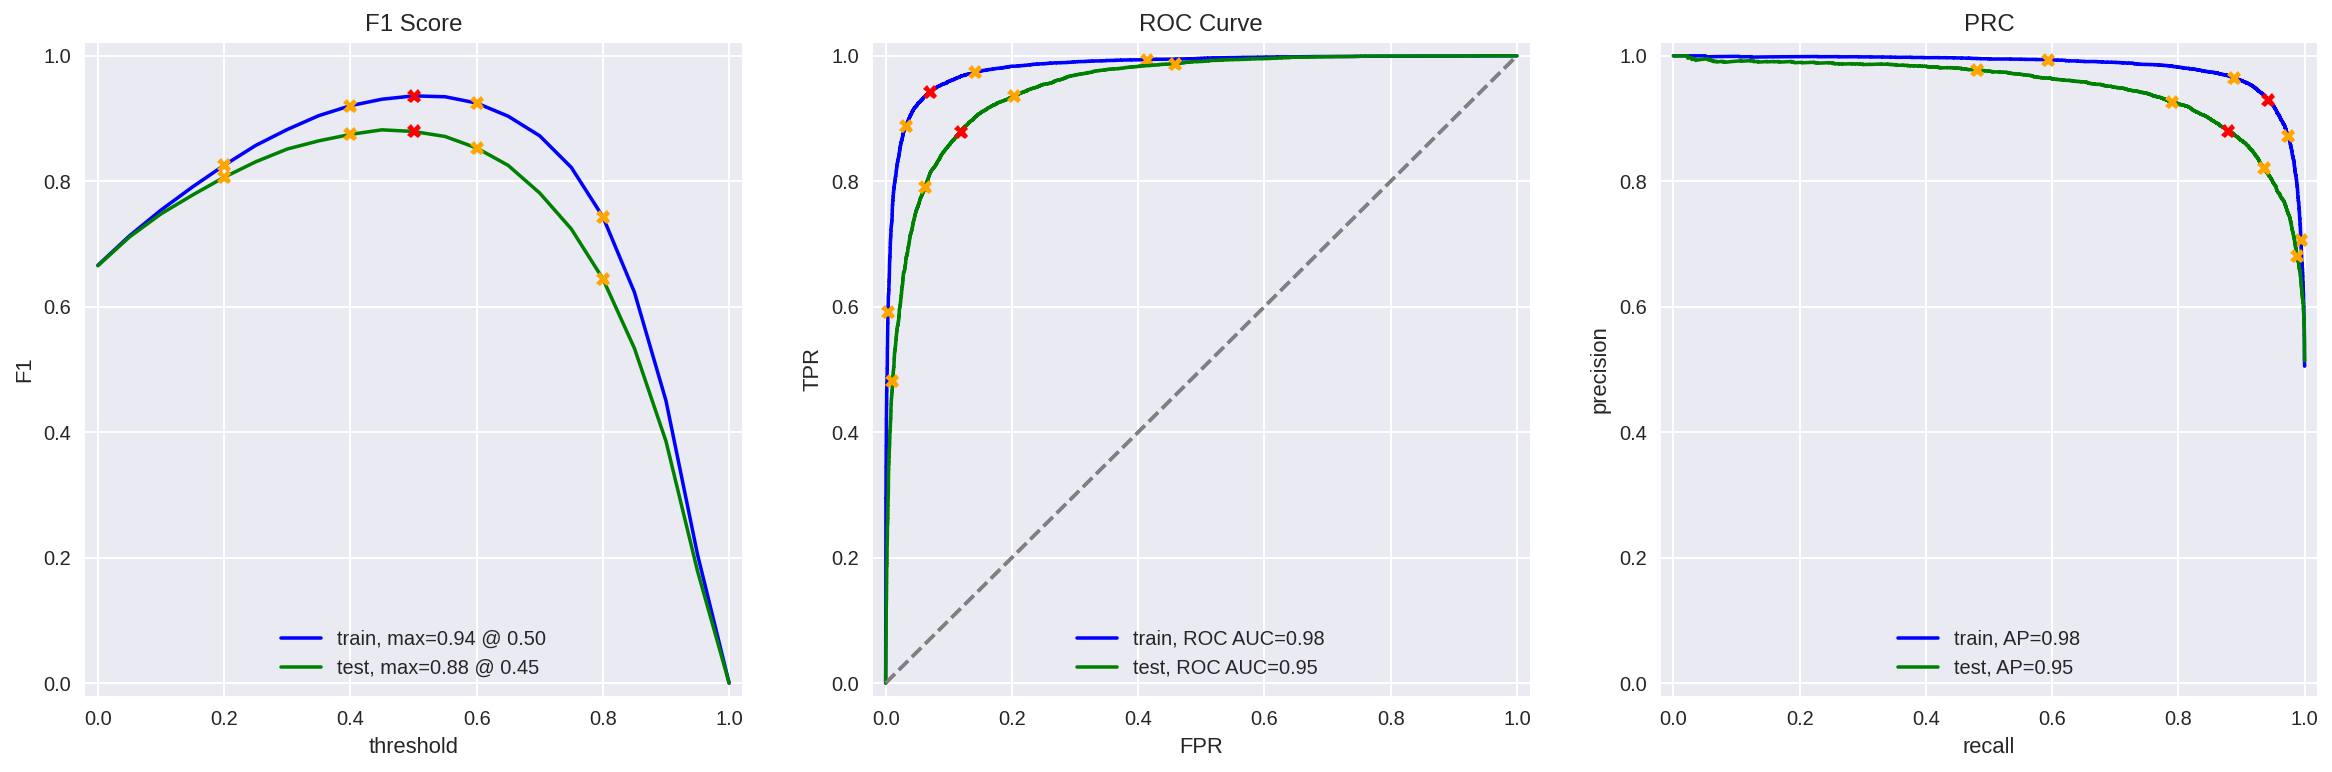

In [30]:
evaluate_model(model_1, X_train1_TFIDF, y_train, X_test1_TFIDF, y_test)

### Model 2 - spaCy, TF-IDF and LR

**Pre-Lemmatization Evaluation**

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(23796,)
(23535,)
(23796, 1)
(23535, 1)
(23796, 71676)
(23535, 71676)
          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


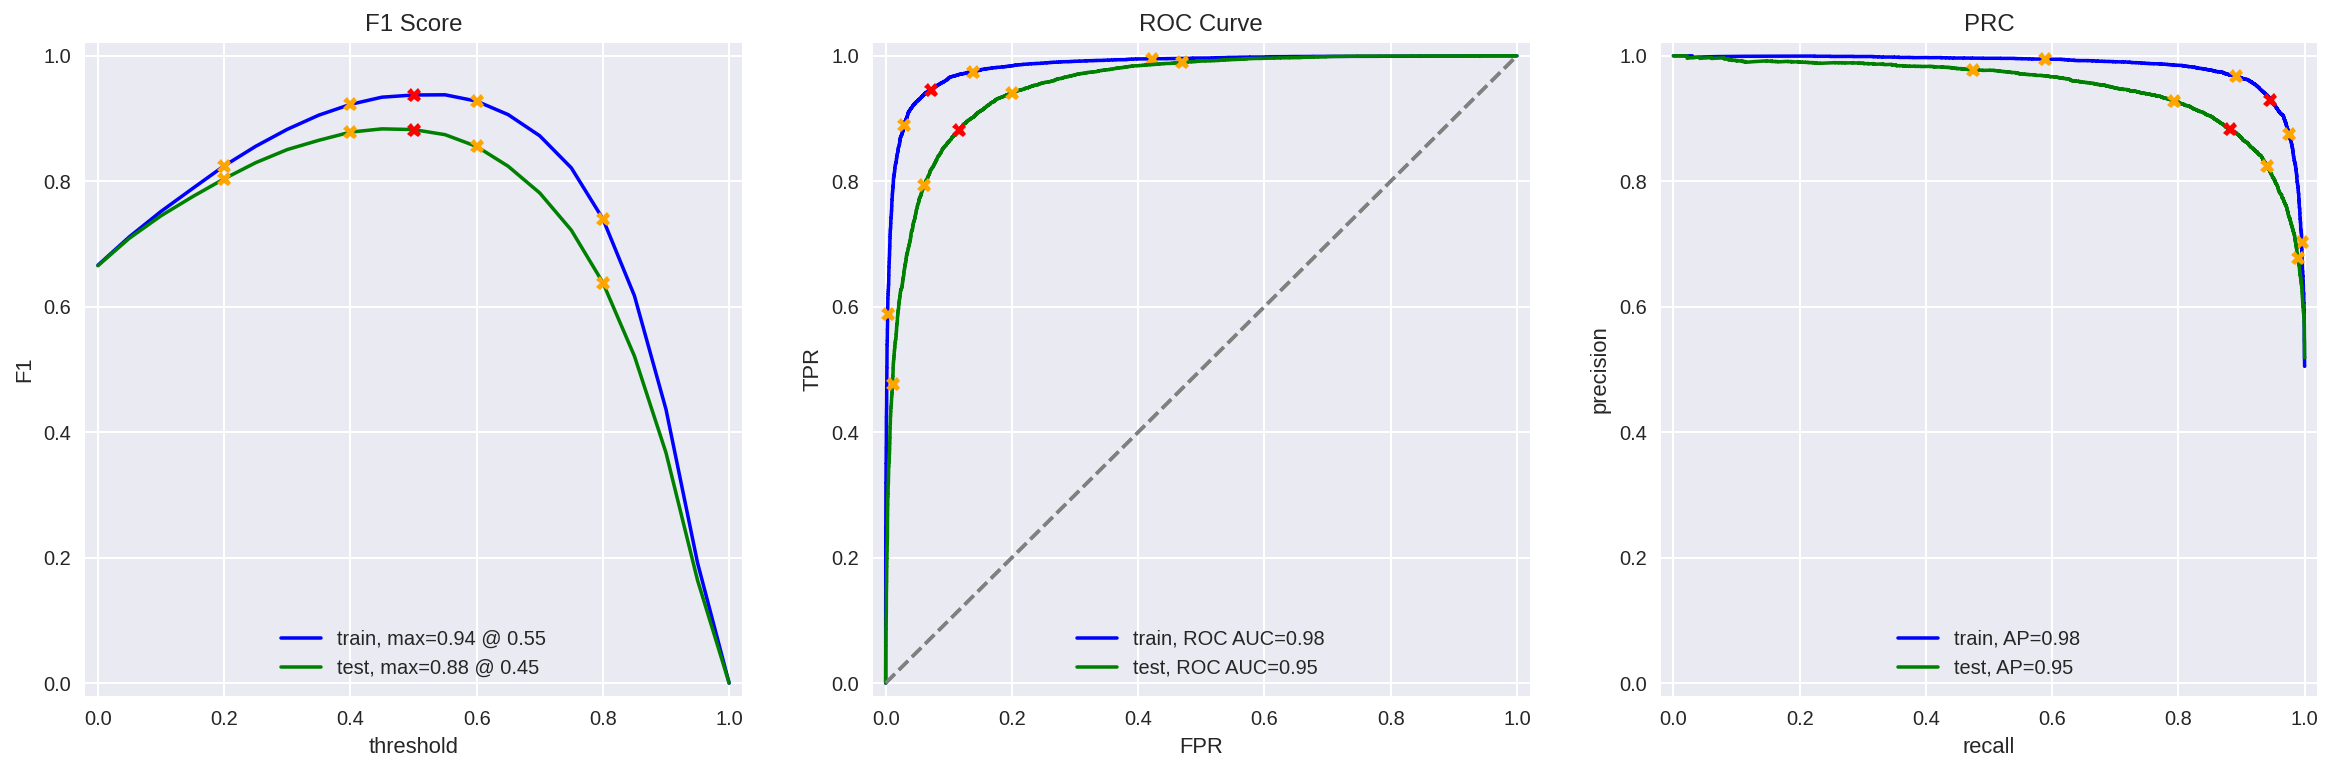

In [31]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()

count_tf_idf2 = TfidfVectorizer(stop_words=stop_words)

#Defining train features & target
X_train2_TFIDF_pre = count_tf_idf2.fit_transform(X_train2) #"use TF-IDF vectors for lemmatized reviews as features"
X_test2_TFIDF_pre = count_tf_idf2.transform(X_test2)

#Defining model and fitting
model_2 = LogisticRegression()
model_2.fit(X_train2_TFIDF_pre, y_train)
print(X_train2.shape)
print(X_test2.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train2_TFIDF_pre.shape)
print(X_test2_TFIDF_pre.shape)

#Evaluation
evaluate_model(model_2, X_train2_TFIDF_pre, y_train, X_test2_TFIDF_pre, y_test)

**Lemmatization**

In [32]:
#import spacy 
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [33]:
%%time
#importing the small spaCy library
import en_core_web_sm

CPU times: user 3.06 s, sys: 484 ms, total: 3.55 s
Wall time: 3min 13s


In [34]:
#def text_preprocessing_3(text):
    
    #doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    #tokens = [token.lemma_ for token in doc]
    
    #return ' '.join(tokens)

In [35]:
#spaCy preprocessing function
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
def lemmatize2(text):

    doc = nlp(text.lower())
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

In [36]:
X_train2 = X_train2.progress_apply(lemmatize2)
X_train2

  0%|          | 0/23796 [00:00<?, ?it/s]

0        the pakage imply that warren beatty and goldie...
1        how the hell do they get this make present its...
7        this true story of carlson 's raider be more o...
8        should have be title ' balderdash ' little in ...
9        the movie ' gung ho ' the story of carlson 's ...
                               ...                        
47253    o my gosh just give I a minute to breath this ...
47254    I can not tell you all how much I love this mo...
47255    legend of zu be possibly the most exciting mov...
47256    this movie be well do on so many level that I ...
47257    as a history nut who be particularly intereste...
Name: review_norm, Length: 23796, dtype: object

In [37]:
X_test2 = X_test2.progress_apply(lemmatize2)
X_test2

  0%|          | 0/23535 [00:00<?, ?it/s]

2        there be no real story the film seem more like...
3        um a serious film about troubled teen in singa...
4        I be totally agree with garryjohal from singap...
5        this be the first movie I 've see from singapo...
6        yes non singaporean 's can not see what be the...
                               ...                        
47326    this be another of my favorite columbo it spor...
47327    talk about be bore I get this expect a fascina...
47328    I never think I would say this about a biopic ...
47329    spirit and chaos be an artistic biopic of miya...
47330    I 'll make this brief this be a joy to watch i...
Name: review_norm, Length: 23535, dtype: object

**Fitting**

In [38]:
X_train2_TFIDF = count_tf_idf2.fit_transform(X_train2) #"use TF-IDF vectors for lemmatized reviews as features"
X_test2_TFIDF = count_tf_idf2.transform(X_test2)

In [39]:
model_2 = LogisticRegression()
model_2.fit(X_train2_TFIDF, y_train)
print(X_train2.shape)
print(X_test2.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train2_TFIDF.shape)
print(X_test2_TFIDF.shape)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(23796,)
(23535,)
(23796, 1)
(23535, 1)
(23796, 59165)
(23535, 59165)


**Evaluation**

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


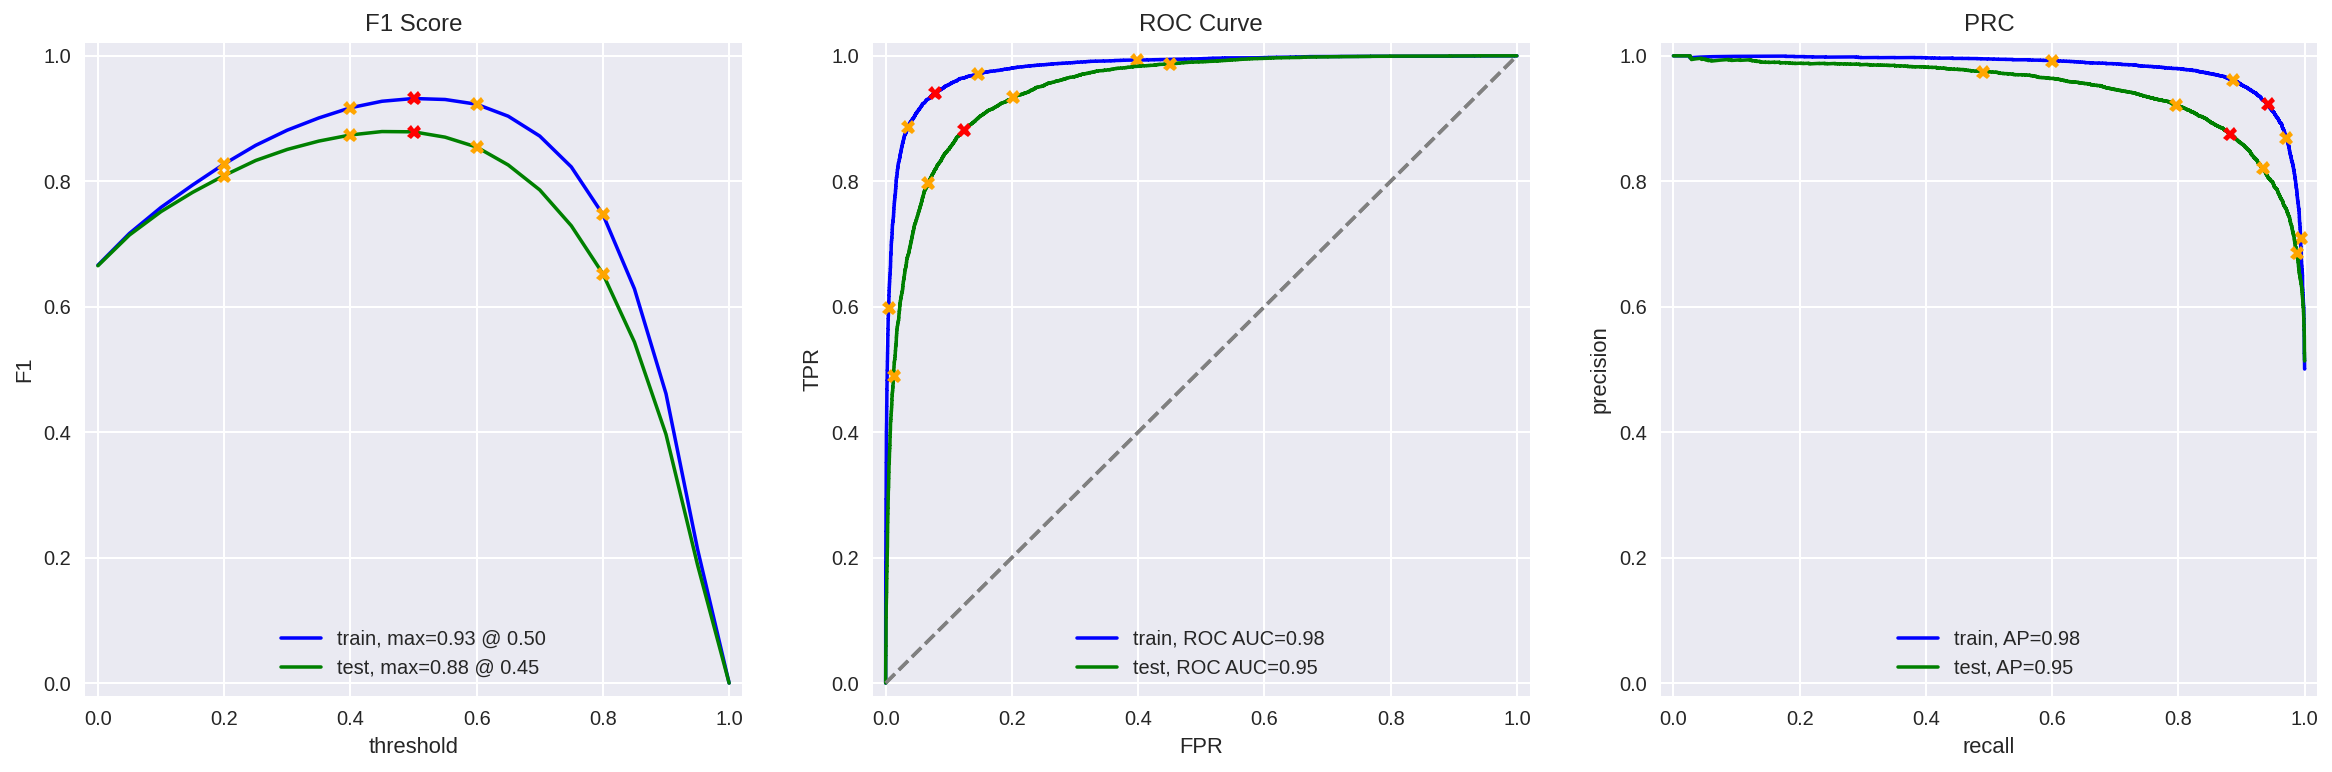

In [40]:
evaluate_model(model_2, X_train2_TFIDF, y_train, X_test2_TFIDF, y_test)

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [41]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

We can reuse the features from the previous model, since this model also specifies **spaCy** preprocessing with **TF-IDF**.

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


          train  test
Accuracy   0.86  0.84
F1         0.87  0.85
APS        0.94  0.92
ROC AUC    0.94  0.92


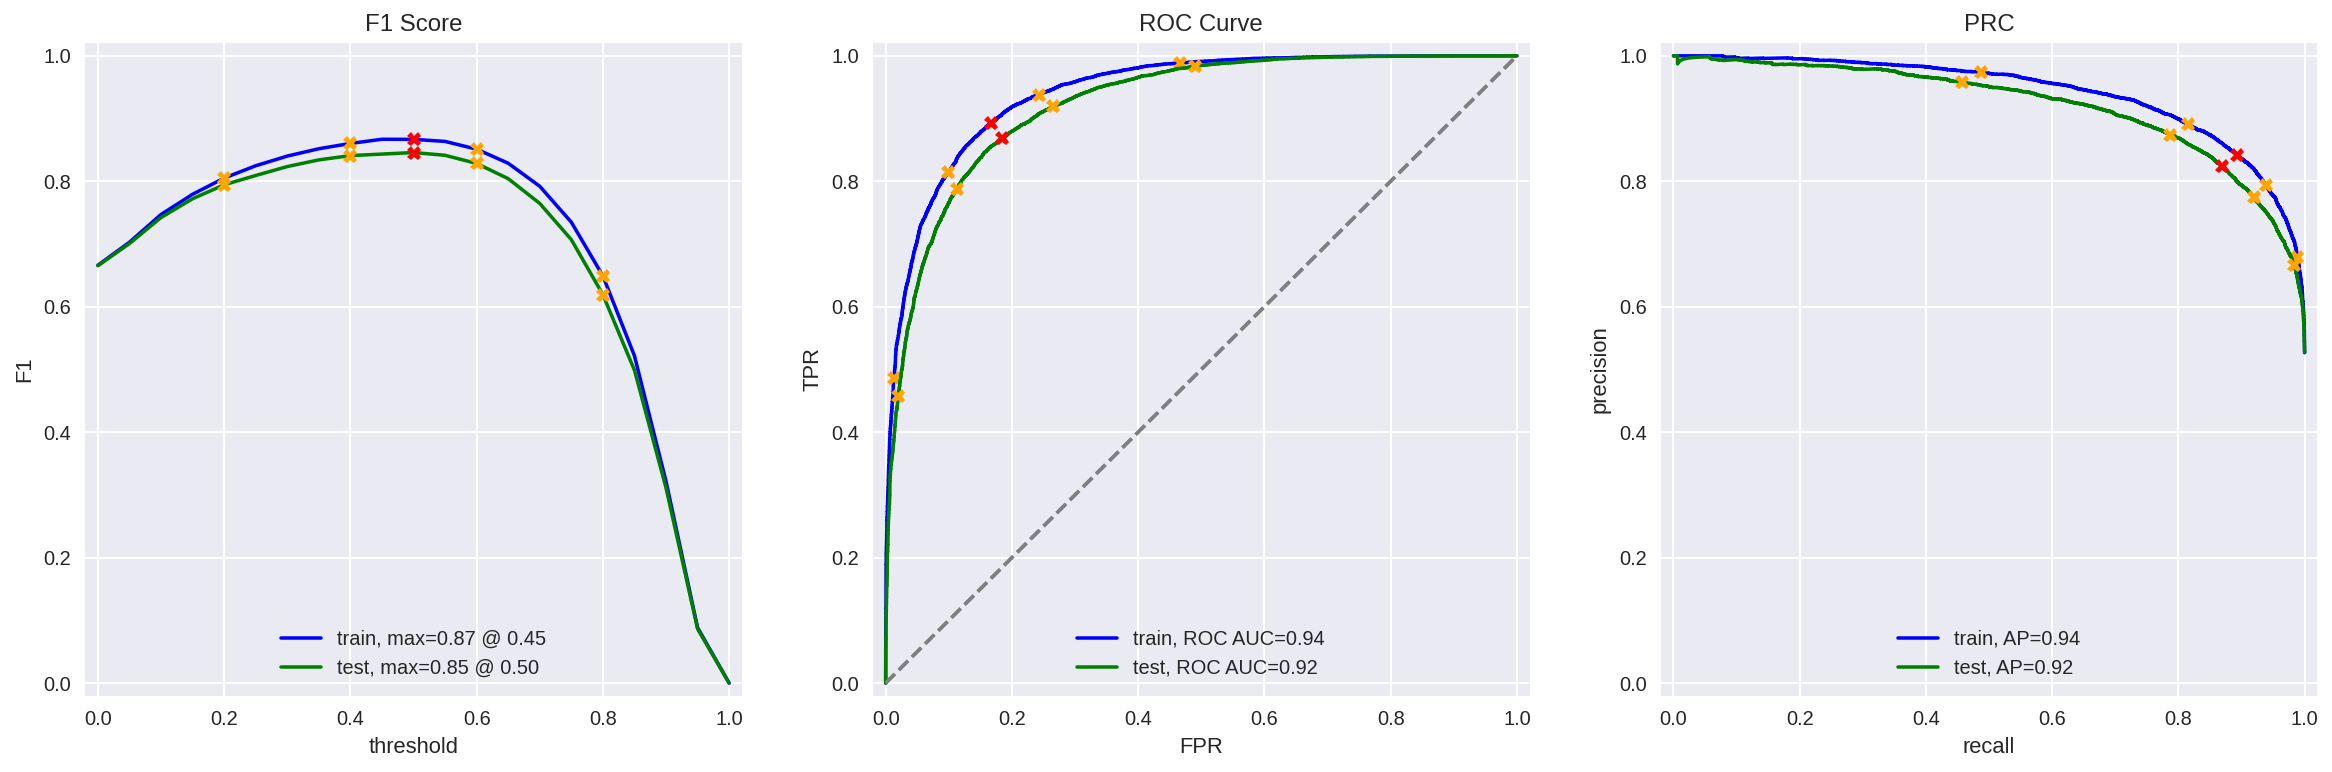

In [42]:
model_3 = LGBMClassifier(num_leaves=12)
model_3.fit(X_train2_TFIDF_pre, y_train)
evaluate_model(model_3, X_train2_TFIDF_pre, y_train, X_test2_TFIDF_pre, y_test)

In [43]:
%%time
model_3 = LGBMClassifier()
params = {
    'num_leaves': [6,12], # large num_leaves helps improve accuracy but might lead to over-fitting
}

grid = GridSearchCV(estimator=model_3, cv=4,
                        param_grid=params, verbose=10)
grid.fit(X_train2_TFIDF, np.ravel(y_train))
print(grid.best_params_)
print(grid.best_score_)
print(grid)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4; 1/2] START num_leaves=6................................................
[CV 1/4; 1/2] END ..............................num_leaves=6; total time=10.8min
[CV 2/4; 1/2] START num_leaves=6................................................
[CV 2/4; 1/2] END ..............................num_leaves=6; total time=12.3min
[CV 3/4; 1/2] START num_leaves=6................................................
[CV 3/4; 1/2] END ..............................num_leaves=6; total time= 2.4min
[CV 4/4; 1/2] START num_leaves=6................................................
[CV 4/4; 1/2] END ..............................num_leaves=6; total time= 3.7min
[CV 1/4; 2/2] START num_leaves=12...............................................
[CV 1/4; 2/2] END .............................num_leaves=12; total time= 6.7min
[CV 2/4; 2/2] START num_leaves=12...............................................
[CV 2/4; 2/2] END .............................num

<div class="alert alert-info">
<b>Student's comment V1</b>

I did some limited hyperparameter tuning, but the time it took to perform this was unpredictable and long (anywhere between 7 min. - 1hr!). I am not sure what causes this. 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Ok, no problem! In this project hyperparameter tuning is not required. I can't say what caused the delay without seeing the actual grid you used (the one commented out should be very fast), but in general keep in mind that the time it takes to fit the grid search grows multiplicatively with the number of unique values of each hyperparameter you want to consider. For example, if you want to try 5 values of hyperparameter 1, 10 values of hyperparameter 2 and 6 values of hyperparameter 3, you need to try models with `5*10*3 = 150` different combinations of hyperparameters. Multiplying by 5 folds, that's `150*5 = 650` models to train. Due to this, it is rarely practical to do exhaustive grid searches. Better approaches are based on randomization. For example, check out [this scikit-learn docs page](https://scikit-learn.org/stable/modules/grid_search.html) which contains some information on randomized search and successive halving. Even more advanced is hyperparameter tuning using [bayesian optimization](https://distill.pub/2020/bayesian-optimization) (in practice, you can use a library like [optuna](https://optuna.org/) — it's not much harder than using GridSearhCV)

</div>

<div class="alert alert-info">
<b>Student's comment V2</b>

I let the previously commented out cell run just so you could see how long it takes and see if theres anything peculiar that would make it take this long. From my perpsective, I see nothing wrong and it should be fast. Also, like you said gridsearch takes awhile based on how many unique values (in my case, I only used 2 unique values for only 1 hyperparameter) so I am at a loss with this one. Since this is done CPU, I hope this isn't because of the computer I'm using (I'm using Macbook pro from 2013).
    
Thank you for the explanations and tip about randomization approach, I'll have to try it in another project!
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Hmm, I see. Well, one thing to keep in mind is that our feature matrix is really wide (we have like 60000 features), so there are some non-trivial computations to be made. But it does seem weird that the model with the same hyperparameter values takes 2 minutes in one cross-validation fold and 10 minutes in another. I'm afraid it might really be the case that the CPU you use is a bit slow. You can try running the same computation on [google colab](https://colab.research.google.com/) and compare the results.

</div>

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


          train  test
Accuracy   0.86  0.84
F1         0.87  0.84
APS        0.94  0.92
ROC AUC    0.94  0.92


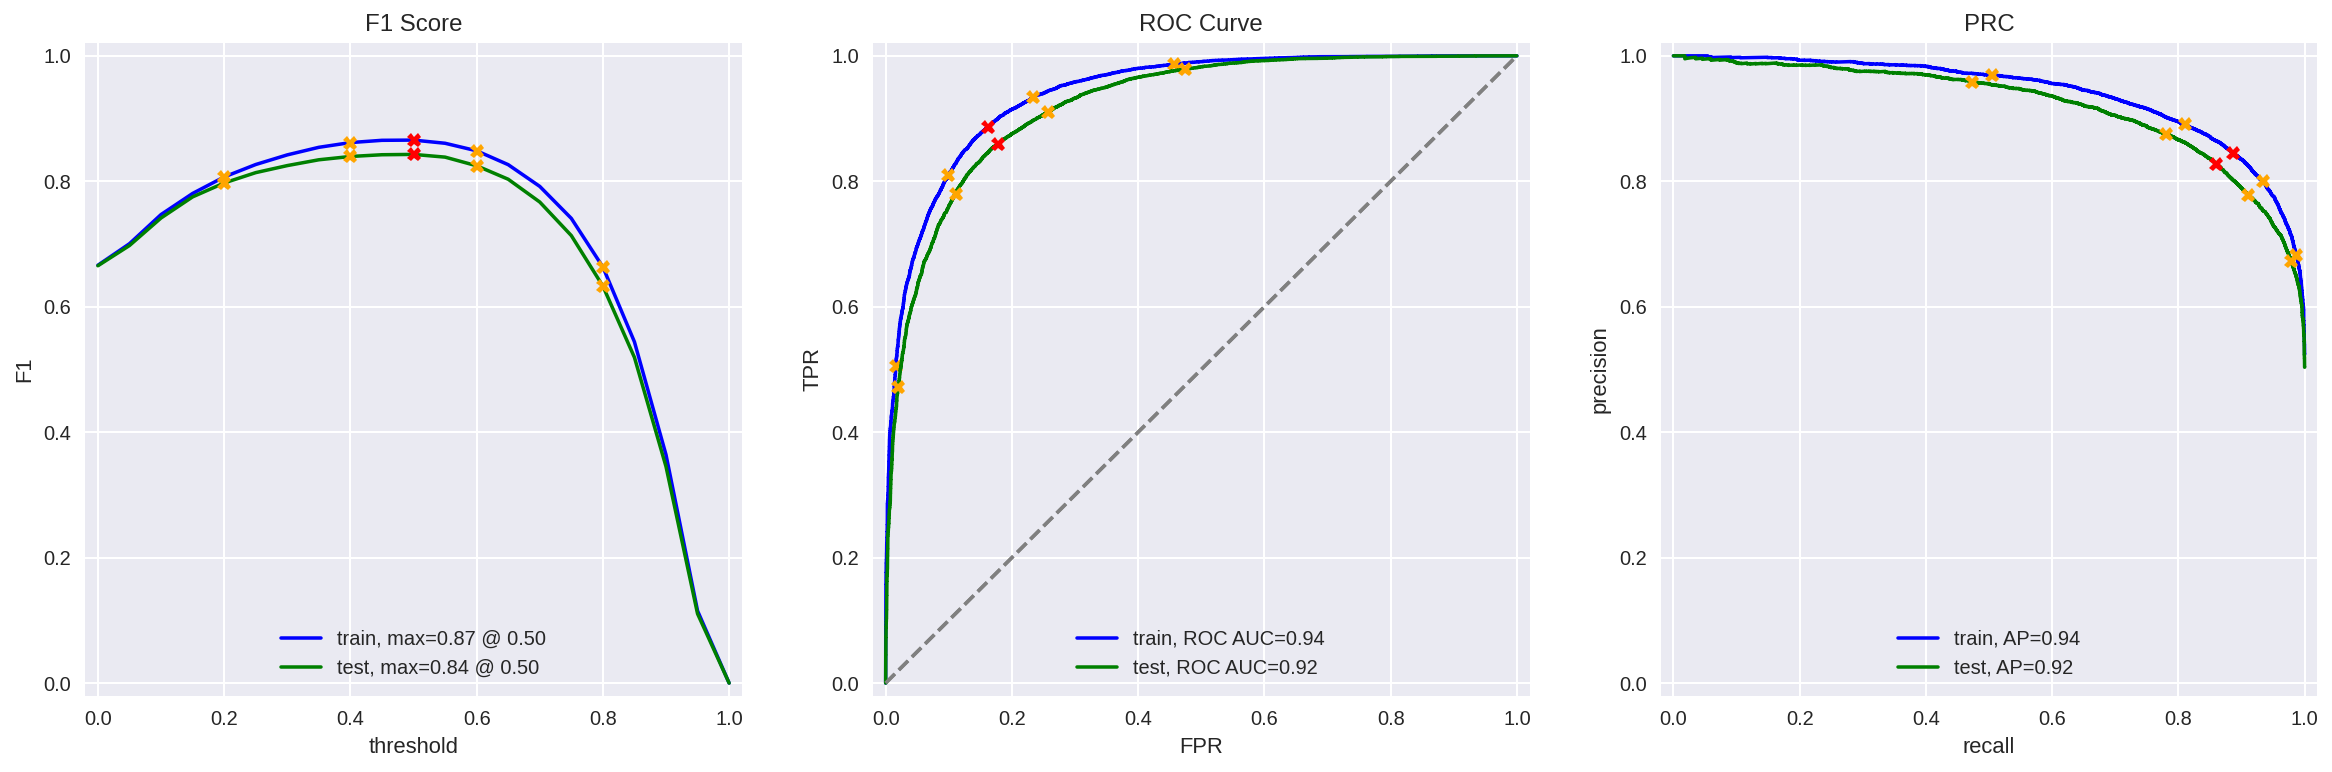

In [44]:
model_3 = LGBMClassifier(num_leaves=12)
model_3.fit(X_train2_TFIDF, y_train)
evaluate_model(model_3, X_train2_TFIDF, y_train, X_test2_TFIDF, y_test)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you successfully vectorized the text data using TF-IDF, tried lemmatization with NLTK and Spacy, and trained a couple of different models using the resulting features

</div>

###  Model 9 - BERT

In [45]:
import torch
import transformers

In [46]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [47]:
#def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    #ids_list = []
    #attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    
    #for id in texts:
        #ids = tokenizer.encode(id.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        #padded = np.array(ids + [0]*(max_length - len(ids)))
        #attention_mask = np.where(padded != 0, 1, 0)
        #ids_list.append(padded)
        #attention_mask_list.append(attention_mask)
        # <put your code here to create ids_list and attention_mask_list>
    
    #if force_device is not None:
        #device = torch.device(force_device)
    #else:
        #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    #model.to(device)
    #if not disable_progress_bar:
        #print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    #embeddings = []

    #for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        #ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        #attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]) 
        # <put your code here to create attention_mask_batch
            
        #with torch.no_grad():            
            #model.eval()
            #batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        #embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    #return np.concatenate(embeddings)

**Sampling the data for 400 entries since BERT takes awhile**

In [48]:
#defining bert features and targets
#X_train_bert = X_train.sample(200).tolist()
#X_test_bert = X_test.sample(200).tolist()
#y_train_bert = y_train.sample(200)
#y_test_bert = y_test.sample(200)

In [49]:
#%%time
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
#X_train_9 = BERT_text_to_embeddings(X_train_bert, force_device='cuda', )
#X_test_9 = BERT_text_to_embeddings(X_train_bert, force_device='cuda', )

In [50]:
#print(df['review_norm'].shape)
#print(X_train_9.shape)
#print(X_test_9.shape)
#print(y_train_bert.shape)
#print(y_test_bert.shape)

In [51]:
#from sklearn.linear_model import LogisticRegression

In [52]:
#model_9 = LogisticRegression()
#model_9.fit(X_train_9, y_train_bert)
#evaluate_model(model_9, X_train_9, y_train_bert, X_test_9, y_test_bert)

In [53]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

<div class="alert alert-info">
<b>Student's comment V2</b>
I would've liked to use BERT, but the last error told me I needed to have the NVIDIA installed to use it. I'm sure NVIDIA has instructions on this but I'm not so good with this kind of thing, also I'm trying to catch up in the curriculum. Otherwise I would have tried to this out!
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

This you can also try running on [google colab](https://colab.research.google.com/). You can use a GPU there for free (you just need to click Runtime —> Change runtime type, and select 'Hardware accelerator' = GPU). All the drivers and so on are already pre-installed, so after that you can just run the code :)
    
The code you commented out should work, if I'm not missing anything

</div>

## My Reviews

In [54]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(clear_text)# <put here the same normalization logic as for the main dataset>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn't expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


### Model 1

In [55]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(count_tf_idf1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.16:  i did not simply like it not my kind of movie
0.18:  well i was bored and felt asleep in the middle of the movie
0.57:  i was really fascinated with the movie
0.17:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.39:  i didn't expect the reboot to be so good writers really cared about the source material
0.49:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.09:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.89:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


<div class="alert alert-info">
<b>Student's comment V1</b>

I am unsure why this error occurs. The features for model_1 are 64447, but the features for model_2 and model_3 are the 59165. This is strange to me because I input model_1 so I'm confused why it says this.

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

The problem is that you reused the TfidfVectorizer for two differently preprocessed train sets: as a result of different preprocessing, they end up having a different number of words in the dictionary of TfidfVectorizer. And the last time `count_tf_idf` was fit on the data used for model_2 and model_3. Just use two different TfidfVectorizers and the problem will go away :)

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

### Model 3

In [56]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(count_tf_idf2.transform(texts.apply(lambda x: lemmatize2(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  i did not simply like it not my kind of movie
0.12:  well i was bored and felt asleep in the middle of the movie
0.49:  i was really fascinated with the movie
0.10:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.27:  i didn't expect the reboot to be so good writers really cared about the source material
0.50:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.03:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.92:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 4

In [57]:
texts = my_reviews['review_norm']

#tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_3.predict_proba(count_tf_idf2.transform(texts.apply(lambda x: lemmatize2(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.60:  i did not simply like it not my kind of movie
0.52:  well i was bored and felt asleep in the middle of the movie
0.60:  i was really fascinated with the movie
0.50:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.68:  i didn't expect the reboot to be so good writers really cared about the source material
0.67:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.38:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.71:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


# Model 9

In [58]:
#texts = my_reviews['review_norm']

#my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

#my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

#for i, review in enumerate(texts.str.slice(0, 100)):
    #print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusions

1) Models 1 and 2 passed the minimum F1 score, however, model 3 did not. This could be due to inadequate hyperparameter tuning.

2) Models 1 and 2 also had the same F1 score (0.88) however, the first model had a faster preprocessing method using NLTK (2 minutes).

3) Model 2's spaCey preprocessing method took about 12 minutes in comparison.

4) For speed and accuracy, I recommend that the company uses the first model.

5) Comparing F1 scores between lemmatized and un-lemmatized models, there was not any difference so I would recommend models that are not lemmatized for faster performance.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Conclusions look good! I would suggest also looking at the results without lemmatization: maybe we don't even need that lengthy preprocessing?

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yeah, so in this case we didn't get any benefits from lemmatization. But in other cases it can still be useful :)

</div>

# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions